## The Diffusion Equation

The Diffusion Equation is a partial differential equation which describes changes in concetration of a substance that diffusing in a spatial system. When the diffusion coefficient `D` of the substance `u` is constant throughout  the system, the diffusion equation takes the form. 

$$
\begin{equation} 
\frac{\partial u}{\partial t} = D \frac{ \partial^2 u}{\partial x^2} \tag{1}
\end{equation}
$$

This equation is also called the Heat Equation, since it also describes the distribution of a heat in a given region over time. It is also Fick’s second law. To solve these type of equations, we need to now the initial conditions, as well as the boundary condition, i.e., the value of `u` at the two edges of the system: `u(0)` and `u(L)`. Lets assume that the value of `u` is constant in one of the edges with a value `u_0`. This is equivalent to assume that our substance `u` is being produced at one side of the system. Let's also assume that at the other edge, `u` dissapears or is being consumed, so `u(L)=0`. Therefore, our boundary conditions are $u(0,t)=u_0$ and $u(L,t)=0$.

If we want to find the steady state solution we obtain:

$$
\begin{equation} 
\frac{\partial u}{\partial t} = D \frac{ \partial^2 u}{\partial x^2} =0 \tag{2}
\end{equation}
$$

In this condition, Fick’s second law is reduced to Laplace’s equation, $\nabla^2 u= 0$. It follows that $u=C_1 x +  C_2$, where  $C_1$ and $C_2$ are intergration constants that we can find using the boundary conditions. 
$$
\begin{equation} 
u(0)=C_1 \cdot 0 + C_2 = C_2\\
u(L)= 0 = C_1 \cdot L + C_2 = C_1 \cdot L + u(0) \\
C_1 = -\frac{u(0)}{L} \tag{3}
\end{equation} 
$$

so the solution of the gradient is simply a straight line when the system is stable, such as:

$$
u_{ss}(x)=  - \frac{u(0)}{L} x + u(0)=u(0)(1-\frac{x}{L}) \tag{4}
$$




In [1]:
using Plots
using LsqFit
gr()

Plots.GRBackend()

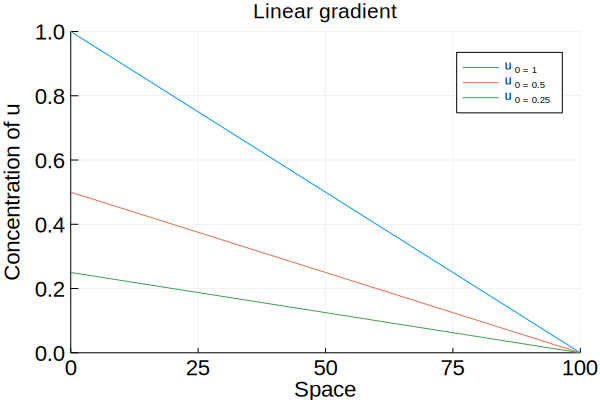

In [2]:
x=collect(0:0.1:100)
u₀=1
L=100
plot(x,x->u₀*(1-(x/L)),label="\\ u_0 = 1",seriestype=:line,ylims = (0,1))
u₀=0.5
L=100
plot!(x,x->u₀*(1-(x/L)),label="\\ u_0 = 0.5",seriestype=:line,ylims = (0,1))
u₀=0.25
L=100
plot!(x,x->u₀*(1-(x/L)),label="\\ u_0 = 0.25",seriestype=:line,
    xaxis = ("Space", (0,100), 0:25:100,  font(15, "Futura")),
    yaxis = ("Concentration of u", (0,1), 0:0.2:1,  font(15, "Futura")))
title!("Linear gradient")
ylabel!("Concentration of u")
xlabel!("Space")

# Reaction-Diffusion

Quite often in biology, these diffusiong substances or morphogenes interact with other substances or receptor molecules, or are being internalized by cells, or simply degraded constantly in the systems. To study this type of systems we use a class of partial differential equations (PDE's) called Reaction-Diffusion Equations. These type of equations are used to describe the diffusion (spreading out) and reaction of one or several chemical species.

In the simplest one-dimensional case and one singel substance, let `u(x,t)` be the concentration of `u` at location `x` at time `t`. Then, the reaction-diffusion equation has the form:

$$
\begin{equation} \frac{\partial u}{\partial t} = \underbrace{D_u \frac{\partial^2 u} 
{\partial x^2}}_{\text{Diffusion}} + \overbrace{f(u)}^{\text{Reaction}}  \tag{5} 
\end{equation}
$$

where `D`  is a coefficient associated with the diffusive properties of `u`, and `f(u)` is a function that describes how `u` grows or decays depending on its current state.

## Degradation or clearance

Lets for now consider the simplest reaction where `u` is simply being consumed in the extended system with a constant rate. This is a very common scenario for morphogens, that are consumed by the cells as they process the information:

$$   
u \overset{k}{\longrightarrow} 0 \tag{6}
$$ 

so, the reaction term is $f(u) = - k \cdot u$. In this case, in a adimensional system, (no diffussion), the system is described by a single first order differential equation. 

 $$\frac{\mathrm{d} u}{\mathrm{d} t} =  - k \cdot u \tag{7}$$ 
 
 with a solution
 
 $$ u (t)= u (0) \cdot e^{- k t}  \tag{8}$$
 
When we combine both diffusion and degradation we have the following equation: 

$$
\begin{equation} 
\frac{\partial u(x,t)}{\partial t} = D \frac{ \partial^2u(x,t)}{\partial x^2} - k \cdot u(x,t) \tag{9}
\end{equation}
$$


if we look for the steady state solution 
$$
\begin{equation} 
\frac{ \partial^2u(x,t)}{\partial x^2} = \frac{k}{D} u(x,t) \tag{10}
\end{equation}
$$
where, the second derivative of `u` with respect to `x` is proportional to itself. The only functions for `u` with this property are exponential functions. Therefore, one can propose a general solution for `u` :

$$
u=  C_1 \cdot e^{-x/\lambda} + C_2 e^{+x/\lambda} \tag{11}
$$

if we test if the previous equation is a solution, the first derivative:
$$
\frac{ \partial u(x,t)}{\partial x}=-\frac{C_1}{\lambda} \cdot e^{-x/\lambda} + \frac{C_2}{\lambda} e^{+x/\lambda} \tag{12}
$$
and the second derivative

$$
\frac{ \partial^2 u(x,t)}{\partial^2 x}=\frac{C_1}{\lambda^2} \cdot e^{-x/\lambda} + \frac{C_2}{\lambda^2} e^{+x/\lambda} \tag{13}
$$

rearranging terms 
$$
\frac{ \partial^2 u(x,t)}{\partial^2 x}=\frac{1}{\lambda^2}(C_1 \cdot e^{-x/\lambda} + C_2 e^{+x/\lambda})=\frac{u}{\lambda^2} \tag{4}
$$

using the Eq 10. we arrive at the condition for the solution

$$
\frac{u(x,t)}{\lambda^2}=\frac{k}{D} u(x,t) \tag{15}
$$
so, the characteristic length of the exponential 
$$
\lambda = \sqrt{\frac{D}{k}} \tag{16}
$$

To determine the constants $C_1$ and $C_2$, we need two equations. We use the two boundary conditions used for the case of only diffusion. 

$$
u(0,t)_{ss}=  C_1 \cdot e^{-0/\lambda} + C_2 e^{+0/\lambda}= C_1 + C_2 = u_0 \tag{17}
$$

$$
u(L,t)_{ss}=  C_1 \cdot e^{-L/\lambda} + C_2 e^{+L/\lambda}= 0 \tag{18}
$$
for the case that the dimensions are much larger than the caracteristic length of the exponential, the second term of the equation goes to infinite, so $C_2$ has to be zero. Therefore $ C_1=u_0 $ and the soultion of the stable gradient is a single exponential:

$$
\begin{equation}  u(x,t)_{ss} = u_0 e^{-x\sqrt{\frac{k}{D}}} \tag{19}
 \end{equation}
$$










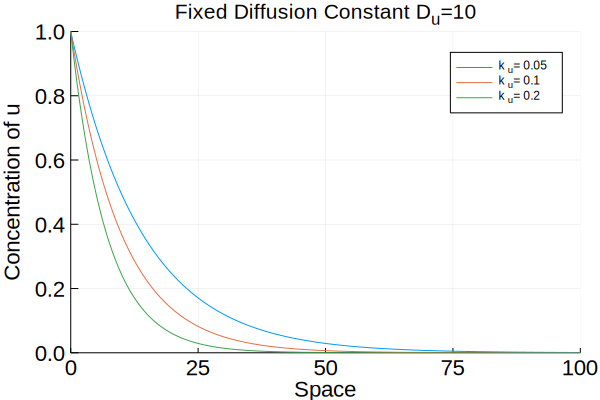

In [3]:
u₀=1
k=0.05
D=10
L=100
plot(x,x->u₀*exp(-x*sqrt(k/D)),label="\\ k_{u} = 0.05",seriestype=:line,ylims = (0,1))
title!("Fixed Diffusion Constant \\ D_{u}=10")


k=0.1
plot!(x,x->u₀*exp(-x*sqrt(k/D)),label="\\ k_{u} = 0.1",seriestype=:line,ylims = (0,1))
k=0.2
#pl=plot!(x,x->u₀*exp(-x*sqrt(k/D)),label="\\ k = 0.2",seriestype=:line,ylims = (0,1),
#xtickfont = font(18, "Futura"),ytickfont = font(18, "Futura"))

pl=plot!(x,x->u₀*exp(-x*sqrt(k/D)),label="\\ k_{u} = 0.2",xaxis = ("Space", (0,100), 0:25:100,  font(15, "Futura")),
    yaxis = ("Concentration of u", (0,1), 0:0.2:1,  font(15, "Futura")))

# display the plot (not done automatically!)
display(pl)
# save the current figure
savefig("ConstantD.pdf")

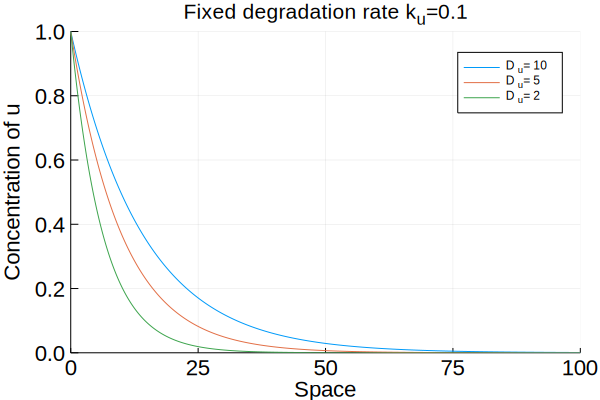

In [4]:
u₀=1
k=0.05
D=10
L=100
plot(x,x->u₀*exp(-x*sqrt(k/D)),label="\\ D_{u} = 10",seriestype=:line,ylims = (0,1))
title!("Fixed degradation rate \\ k_{u}=0.1")
xlabel!("Space")
ylabel!("Concentration of u")

D = 5
plot!(x,x->u₀*exp(-x*sqrt(k/D)),label="\\ D_{u} = 5",seriestype=:line,ylims = (0,1))
D = 2
pl=plot!(x,x->u₀*exp(-x*sqrt(k/D)),label="\\ D_{u} = 2",seriestype=:line,
    xaxis = ("Space", (0,100), 0:25:100,  font(15, "Futura")),
    yaxis = ("Concentration of u", (0,1), 0:0.2:1,  font(15, "Futura")))
# display the plot (not done automatically!)
display(pl)
# save the current figure
savefig("ConstantK.pdf")

## Binding to a receptor 

Another porrsibility that could interfere with the spatial arrangement of a gradient is the fact that the morphogen is binding and unbinding to a receptor that is being expressed by teh cells in the tissue. Thsi has been shown to be the case in many systems. To study how this will affect the dynamcis of the patter, we write the equations  

$$   
u + v \overset{k_{on}}{\underset{k_{off}}{\longleftrightarrow}}  uv \tag{20}
$$ 


Using the law of mass action,  in a adimensional system, (no diffussion), the dynamics of $u$ is described by a single first order differential equation. 

 $$ \frac{\mathrm{d} u}{\mathrm{d} t} =  k_{off} \cdot uv - k_{on} \cdot u \cdot v \tag{21}$$ 
 
 which in equilibrium is simply:
 
  $$ uv = \frac{ k_{on}}{k_{off}}  u \cdot v = \frac{u \cdot v}{k_d} \tag{22}$$ 
 
where $k_d$ is defined as the dissociation constant of the interaction between $u$ and its receptor $v$.

when we consider now the diffusion problem, we have to take into account the diffusion and degradation of the three components of the system:


$$
\begin{align*}
\frac{\partial u(x,t)}{\partial t} &= D_{u} \frac{ \partial^2u (x,t)}{\partial x^2} - k_{u}\cdot u(x,t) + k_{off} \cdot uv(x,t) - k_{on} \cdot u(x,t) \cdot v(x,t)\tag{23}\\
\frac{\partial uv(x,t)}{\partial t} &= D_{uv} \frac{ \partial^2uv(x,t)}{\partial x^2} - k_{uv} \cdot uv(x,t)- k_{off} \cdot uv(x,t) + k_{on} \cdot u(x,t) \cdot v(x,t) \tag{24}\\
\frac{\partial v(x,t)}{\partial t} &= D_{v} \frac{ \partial^2v(x,t)}{\partial x^2} - k_{v} \cdot v(x,t)+ k_{off} \cdot uv(x,t) - k_{on} \cdot u(x,t) \cdot v(x,t) \tag{24}
\end{align*}
$$


with the condition 
$$u_{total}(x,t)=u(x,t)+uv(x,t) \tag{25}$$

Taking the derivatives of the last expression

$$
\frac{\partial u_{total}(x,t)}{\partial t} = \frac{\partial u(x,t)}{\partial t} + \frac{\partial uv(x,t)}{\partial t}\tag{26}
$$

therefore, the expression for the total change $u_{total}$ in terms of the change of the two forms of $u$ is given by the following expressio: 

$$
\begin{equation} 
\frac{\partial u_{total}(x,t)}{\partial t} = D_{u} \frac{ \partial^2u(x,t)}{\partial x^2} - k_u \cdot u (x,t) + D_{uv} \frac{ \partial^2uv(x,t)}{\partial x^2} - k_{uv} \cdot uv(x,t)\tag{27}
\end{equation}
$$

in our case, we will assume that the diffusion coefficient of the morphogen when bound to the receptor is negligible, since it is slowed down by the receptors attached to the plasma membrane

$$
\begin{equation} 
\frac{\partial u_{total}(x,t)}{\partial t} = D_{u} \frac{ \partial^2u(x,t)}{\partial x^2} - k_u \cdot u (x,t) - k_{uv} \cdot uv(x,t)\tag{28}
\end{equation}
$$

To solve the equation, we need to perform annother aproximation. In most cases, the kinetics of binding and unbinding are quite fast compared to diffusion. If this is the case, we can use separation of time scales to assume 
 a local equilibrium between $u$ and $uv$. In this condition, we can use the solution in Eq 22 corresponding to the steady state that correlates the concentration of the
 
 $$
\begin{equation} 
\frac{\partial u_{total}(x,t)}{\partial t} =  \frac{\partial u(x,t)}{\partial t} + \frac{1}{k_d}  \frac{\partial (u(x,t)\cdot v(x,t)}{\partial t}  \tag{29}
\end{equation}
$$

The next approximation assumes that only a small amount of all the available receptors $v$ are bound to the ligand $u$. In these conditions, the amount of $v$ is constant in space and time ($v(x,t)=v_0$)and can be moved outside of the partial derivative. 

 $$
\begin{equation} 
\frac{\partial u_{total}(x,t)}{\partial t} =  \frac{\partial u(x,t)}{\partial t} + \frac{v_0}{k_d}  \frac{\partial u(x,t)}{\partial t} = \frac{k_d+v_0}{k_d} \frac{\partial u(x,t)}{\partial t} \tag{30}
\end{equation}
$$



Expression 30 can be incorporated into Eq 28, togeter with Eq 22 

$$
\begin{equation} 
\frac{k_d+v_0}{k_d} \frac{\partial u(x,t)}{\partial t}  = D \frac{ \partial^2u(x,t)}{\partial x^2} - k_u \cdot u (x,t)- k_{uv} \cdot \frac{u(x,t)\cdot v_0}{k_d}\tag{31}
\end{equation}
$$

and rearranging terms becomes:

$$
\begin{equation} 
 \frac{\partial u(x,t)}{\partial t}  = D\frac{k_d}{k_d+v_0} \frac{ \partial^2u(x,t)}{\partial x^2} - \frac{k_d}{k_d+v_0} (k_u+\frac{k_{uv}\cdot v_0}{k_d}) \cdot u (x,t) \tag{32}
\end{equation}
$$


So we can define a effective diffusion coefficient as:
$$
\begin{equation} 
D_{eff} =\frac{D \cdot k_d}{k_d+v_0}  \tag{33}
\end{equation}
$$
and an effective clearance of the morphogen as 

$$
\begin{equation} 
k_{eff} =\frac{k_d}{k_d+v_0} (k_u+\frac{k_{uv}\cdot v_0}{k_d})   \tag{34}
\end{equation}
$$
and rewrite Eq 32 as simply. 

$$
\begin{equation} 
\frac{\partial u(x,t)}{\partial t} = D_{eff} \frac{ \partial^2u(x,t)}{\partial x^2} - k_{eff} \cdot u(x,t) \tag{36}
\end{equation}
$$

This equation can be solved analytically following the same strategy as Eq 9. The steady solution for large systems is then:


$$
\begin{equation}  u(x,t)_{ss} = u_0 e^{-x\sqrt{\frac{k_{eff}}{D_{eff}}}} \tag{37}
 \end{equation}
$$

Therefore, the steady state profile of the morphogen when we include receptor bindind and different degradation or clearance when the morphogen bounds to the receptor is again an exponential function, where the chraracteristic length of the exponential depends both on the binding affinity towards the receptor and the degradation rates of both bound and unbound morphogen. Again, the characteristic length of the exponential is now


$$
\lambda = \sqrt{\frac{D_eff}{k_eff}}=  \sqrt{\frac{D}{k_u+\frac{k_{uv}\cdot v_0}{k_d}}} \tag{37}
$$

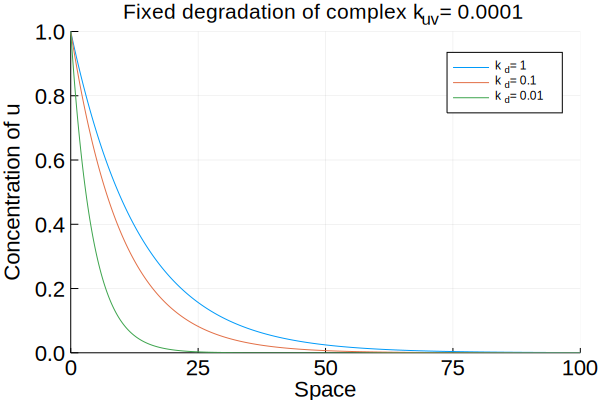

In [5]:
u₀=1
v₀=100
k_u=0.1
k_uv=0.0001
D=20
L=100


k_d=1
D_eff=D*k_d/(k_d+v₀)
k_eff=(k_d)/(k_d+v₀)*(k_u+(k_uv*v₀/k_d))
plot(x,x->u₀*exp(-x*sqrt(k_eff/D_eff)),label="\\ k_{d} = 1",seriestype=:line,ylims = (0,1))
title!("Fixed degradation of complex \\ k_{uv} = 0.0001")
xlabel!("Space")
ylabel!("Concentration of u")

k_d=0.1
D_eff=D*k_d/(k_d+v₀)
k_eff=(k_d)/(k_d+v₀)*(k_u+(k_uv*v₀/k_d))
plot!(x,x->u₀*exp(-x*sqrt(k_eff/D_eff)),label="\\ k_{d} = 0.1",seriestype=:line,ylims = (0,1))

k_d=0.01
D_eff=D*k_d/(k_d+v₀)
k_eff=(k_d)/(k_d+v₀)*(k_u+(k_uv*v₀/k_d))
pl=plot!(x,x->u₀*exp(-x*sqrt(k_eff/D_eff)),label="\\ k_{d}  = 0.01",seriestype=:line,
    xaxis = ("Space", (0,100), 0:25:100,  font(15, "Futura")),
    yaxis = ("Concentration of u", (0,1), 0:0.2:1,  font(15, "Futura")))
# display the plot (not done automatically!)
display(pl)
# save the current figure
savefig("Constantkcomplex.pdf")

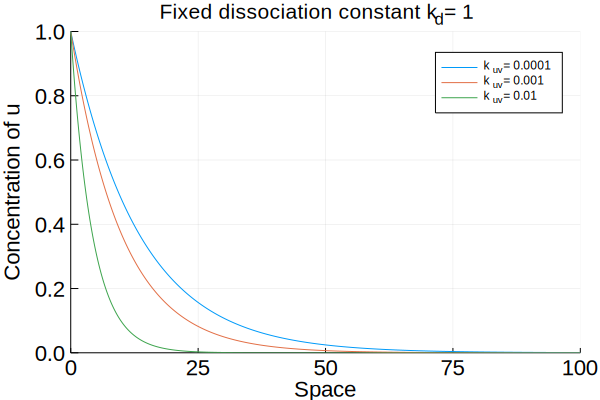

In [6]:
u₀=1
v₀=100
k=0.1
D=20
L=100
k_d=1

k_uv=0.0001
D_eff=D*k_d/(k_d+v₀)
k_eff=(k_d)/(k_d+v₀)*(k_u+(k_uv*v₀/k_d))
plot(x,x->u₀*exp(-x*sqrt(k_eff/D_eff)),label="\\ k_{uv}= 0.0001",seriestype=:line,ylims = (0,1))
title!("Fixed dissociation constant \\ k_{d}   = 1")
xlabel!("Space")
ylabel!("Concentration of u")

k_uv=0.001
D_eff=D*k_d/(k_d+v₀)
k_eff=(k_d)/(k_d+v₀)*(k_u+(k_uv*v₀/k_d))
plot!(x,x->u₀*exp(-x*sqrt(k_eff/D_eff)),label="\\ k_{uv}= 0.001",seriestype=:line,ylims = (0,1))

k_uv=0.01
D_eff=D*k_d/(k_d+v₀)
k_eff=(k_d)/(k_d+v₀)*(k_u+(k_uv*v₀/k_d))
pl=plot!(x,x->u₀*exp(-x*sqrt(k_eff/D_eff)),label="\\ k_{uv}= 0.01",seriestype=:line,
    xaxis = ("Space", (0,100), 0:25:100,  font(15, "Futura")),
    yaxis = ("Concentration of u", (0,1), 0:0.2:1,  font(15, "Futura")))
# display the plot (not done automatically!)
display(pl)
# save the current figure
savefig("Constantkd.pdf")

## Numerical simulations of reaction-diffusion

More complex combinations of reaction and diffusion have to be solved numerically. This is done using a simultaneous discretization of space and time.  Tod do that, we have to discretize time and space. We will use the simples approach of using an euler discretization method.

In [7]:
## spatial scaling
number_of_steps=100;
size_of_system=100;
space_step=size_of_system/number_of_steps;
x = LinRange(0,size_of_system,number_of_steps);

In [8]:
## temporal scaling
number_of_iterations=1000;
total_time=70;
time_step=total_time/number_of_iterations;

In [9]:
## Parameters and initial conditions
D=10; # ?m^2/min 
u=zeros(1,number_of_steps)
u[1]=1;
u_=u; 

In [10]:
plt=plot(x,u');

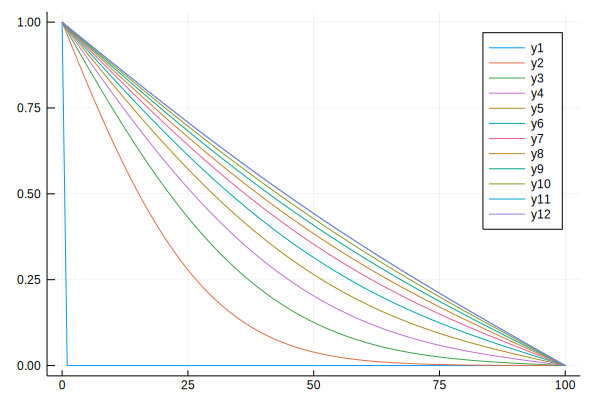

In [11]:
for ii=1:number_of_iterations
    for i=2:number_of_steps-1
       u[i]= u_[i] + time_step * D * (u_[i-1]-2*u_[i]+u_[i+1])/(space_step*space_step);  
    end
    
    
    u[1]=1; # fixed boundary conditions
    u[number_of_steps]=0; # fixed boundary conditions
    
    #u[1]=u[2]; # zero flux boundary conditions
    #u[number_of_steps]=u[number_of_steps-1]; # zero flux boundary conditions
    
    #u[1]=u[number_of_steps]; # periodic boundary conditions
    
    u_=u;
    if   ii% 100 == 0
        plot!(x,u')
        
        
    end
end
#display(plt)
plot!(x,u')

We see that the system steady state is a straigth line, as predicted by the theory

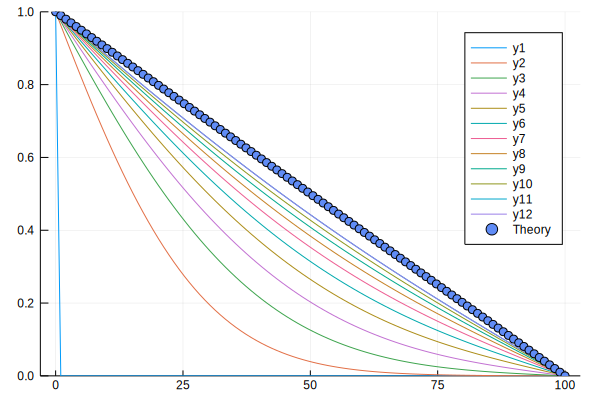

In [12]:
u₀=1
L=100
plot!(x,x->u₀*(1-(x/L)),label="Theory",seriestype=:scatter,ylims = (0,1))

If we now introduce a constant consumption of the morphogen across the system we have the exponential gradient predicted by the theory

In [13]:
## spatial scaling
number_of_steps=100;
size_of_system=100;
space_step=size_of_system/number_of_steps;
x = LinRange(0,size_of_system,number_of_steps)

## temporal scaling
number_of_iterations=1000;
total_time=70;
time_step=total_time/number_of_iterations;

## Parameters and initial conditions
D=10; # ?m^2/min 
k=0.1
u₀=1
u=zeros(1,number_of_steps)
u[1]=u₀;
u_=u; 

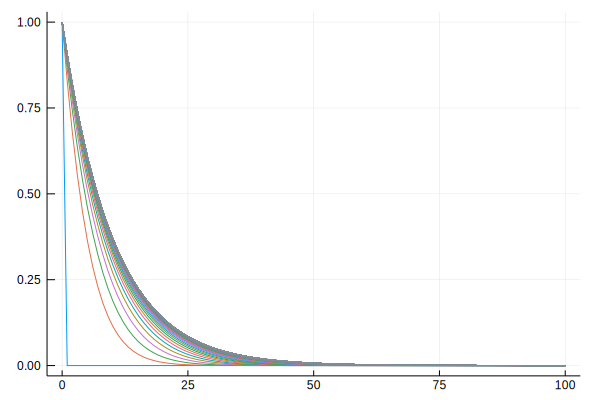

In [14]:
plt=plot(x,u');
for ii=1:number_of_iterations
    for i=2:number_of_steps-1
       u[i]= u_[i] + time_step *(-k*u_[i]+ D * (u_[i-1]-2*u_[i]+u_[i+1])/(space_step*space_step));  
    end
    
    u[1]=1; # fixed boundary conditions
    u[number_of_steps]=0; # fixed boundary conditions
    
    #u[1]=u[2]; # zero flux boundary conditions
    #u[number_of_steps]=u[number_of_steps-1]; # zero flux boundary conditions
    
    #u[1]=u[number_of_steps]; # periodic boundary conditions
    
    u_=u;
    if   ii% 5 == 0
        plot!(x,u',legend=false)
        
        
    end
end
display(plt)
#plot!(x,u')

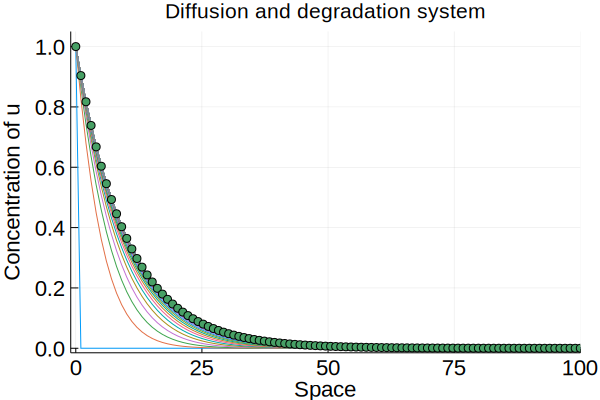

In [15]:
plot!(x,x->u₀*exp(-x*sqrt(k/D)),label="Theory",seriestype=:scatter,
    xaxis = ("Space", (-1,100), 0:25:100,  font(15, "Futura")),
    yaxis = ("Concentration of u", (-0.015,1.05), 0:0.2:1,  font(15, "Futura")))
title!("Diffusion and degradation system")
# display the plot (not done automatically!)
display(plt)
# save the current figure
savefig("Simulations_diff_deg.pdf")

This code can be arbitratialy complicated when the system has more than one variable and complex interactions. When interactions are nonlinear, intersting things can happen, such as Turing patterns or spiral waves. 

## Inmobilization of ligand by the  receptor

As a first analysis of how the gradient is shaped when including receptor-ligand interaction, we will perform the numerical simulation of the case solved analytically when a ligand binds to a receptor. we have binding and unbinding of the ligand to the receptor, and degradation of receptor, plus clearance of the ligand-receptor complex. We assume as a firts aproximation, that the receptor is not being consumed, or that is concentration is maintained constant. 


$$
\begin{align} 
u + v &\overset{k_{on}}{\longrightarrow} uv \tag{6}\\
uv &\overset{k_{off}}{\longrightarrow} v + u  \tag{7}\\
u &\overset{k_{u}}{\longrightarrow} 0 \tag{8}\\
uv &\overset{k_{uv}}{\longrightarrow} 0 \tag{9}
\end{align}
$$

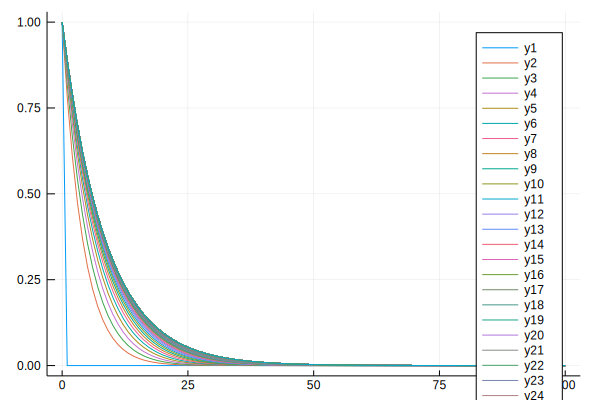

In [16]:
## spatial scaling
number_of_steps=100;
size_of_system=100;
space_step=size_of_system/number_of_steps;
x = LinRange(0,size_of_system,number_of_steps)

## temporal scaling
number_of_iterations=8000;
total_time=600;
time_step=total_time/number_of_iterations;

## initialize vectors
u=zeros(number_of_steps,1)
v₀=1
v=ones(number_of_steps,1)*v₀
uv=zeros(number_of_steps,1)

## Parameters and initial conditions
D=10; # ?m^2/min 

k_u=0.05
k_uv=0.05
u₀=1
k_on=1
k_off=0.5 #new

u[1]=u₀;
u_=u; 
uv_=uv; 
v_=v; 

P1=plot(x,u)
for ii=1:number_of_iterations
    for i=2:number_of_steps-1
       u[i]= u_[i] + time_step *(- k_on * u_[i] * v₀ + k_off * uv_[i] - k_u * u_[i] + D * (u_[i-1] - 2 *u_[i]+u_[i+1])/(space_step*space_step));
       uv[i]= uv_[i] + time_step *(k_on * u_[i] * v₀ - k_off * uv_[i]- k_uv * uv_[i]);
    end
    
    u[1]=1;# fixed boundary conditions
    u[number_of_steps]=0; # fixed boundary conditions
    
    v[1]=v[2]; # zero flux boundary conditions
    uv[1]=uv[2]; # zero flux boundary conditions
    v[number_of_steps]=v[number_of_steps-1]; # zero flux boundary conditions
    uv[number_of_steps]=uv[number_of_steps-1]; # zero flux boundary conditions
    
    #u[1]=u[number_of_steps]; # periodic boundary conditions
    
    u_=u;v_=v;uv_=uv;
    if   ii% 20 == 0
        P1=plot!(x,u)
        #P2=plot!(x,v)
    end
end
display(P1)
#P1=plot!(x,u)
#P2=plot(x,v)
#plot(P1,P2,layout=(1,2))

lets plot the prediction alongside with the simulation

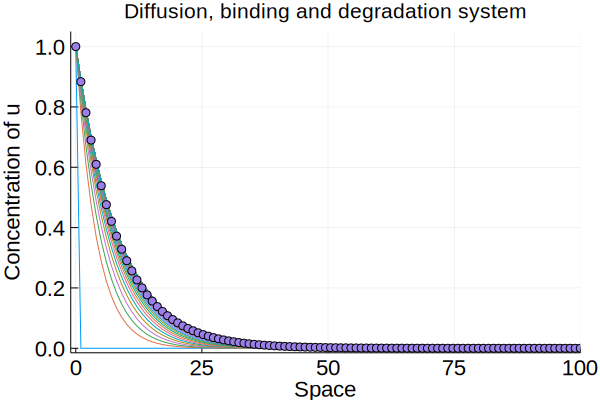

In [17]:
k_d=k_off/k_on
D_eff=D * k_d /(k_d+v₀)
k_eff=(k_u+(k_uv*v₀/k_d))* k_d/ (k_d+v₀)
plot!(x,x->u₀*exp(-x*sqrt(k_eff/D_eff)),legend=false,label="theory",seriestype=:scatter,
    xaxis = ("Space", (-1,100), 0:25:100,  font(15, "Futura")),
    yaxis = ("Concentration of u", (-0.015,1.05), 0:0.2:1,  font(15, "Futura")))
title!("Diffusion, binding and degradation system")
# display the plot (not done automatically!)
display(P1)
# save the current figure
savefig("Simulations_diff_bind_deg.pdf")

The simulation produces the same steady state profile of the theory. 

## Receptor consumption

Lets test now the conditions where the receptor concentration is not constant (it is consumed in the interaction with the ligand)

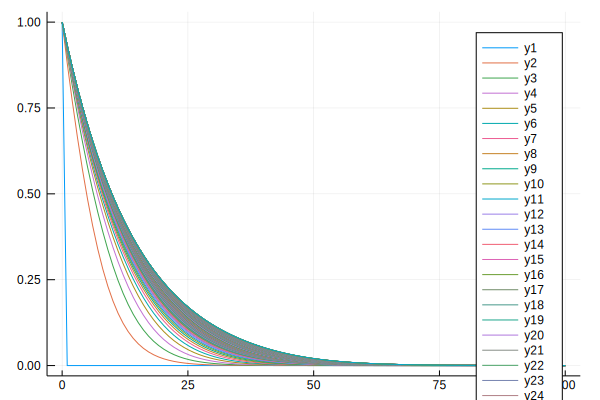

In [18]:
## spatial scaling
number_of_steps=100;
size_of_system=100;
space_step=size_of_system/number_of_steps;
x = LinRange(0,size_of_system,number_of_steps)

## temporal scaling
number_of_iterations=8000;
total_time=600;
time_step=total_time/number_of_iterations;

## initialize vectors
u=zeros(number_of_steps,1)
v₀=1
v=ones(number_of_steps,1)*v₀
uv=zeros(number_of_steps,1)

## Parameters and initial conditions
D=10; # ?m^2/min 

k_u=0.05
k_uv=0.05
u₀=1
k_on=1
k_off=0.5 #new

u[1]=u₀;
u_=u; 
uv_=uv; 
v_=v; 

P1=plot(x,u)
for ii=1:number_of_iterations
    for i=2:number_of_steps-1
       u[i]= u_[i] + time_step *(- k_on * u_[i] * v_[i] + k_off * uv_[i] - k_u * u_[i] + D * (u_[i-1] - 2 *u_[i]+u_[i+1])/(space_step*space_step));
       uv[i]= uv_[i] + time_step *(k_on * u_[i] * v_[i] - k_off * uv_[i] - k_uv * uv_[i]);
       v[i]= v_[i] + time_step *(- k_on * u_[i] * v_[i] + k_off * uv_[i]);  
    end
    
    u[1]=1;# fixed boundary conditions
    u[number_of_steps]=0; # fixed boundary conditions
    
    v[1]=v[2]; # zero flux boundary conditions
    uv[1]=uv[2]; # zero flux boundary conditions
    v[number_of_steps]=v[number_of_steps-1]; # zero flux boundary conditions
    uv[number_of_steps]=uv[number_of_steps-1]; # zero flux boundary conditions
    
    #u[1]=u[number_of_steps]; # periodic boundary conditions
    
    u_=u;v_=v;uv_=uv;
    if   ii% 50 == 0
        P1=plot!(x,u)
        #P2=plot!(x,v)
    end
end
display(P1)
#P1=plot!(x,u)
#P2=plot(x,v)
#plot(P1,P2,layout=(1,2))

lets plot the prediction alongside with the simulation

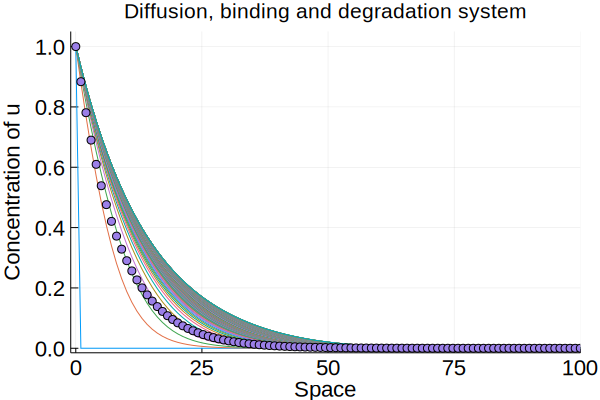

In [19]:
k_d=k_off/k_on
D_eff=D * k_d /(k_d+v₀)
k_eff=(k_u+(k_uv*v₀/k_d))* k_d/ (k_d+v₀)
plot!(x,x->u₀*exp(-x*sqrt(k_eff/D_eff)),legend=false,label="theory",seriestype=:scatter,
    xaxis = ("Space", (-1,100), 0:25:100,  font(15, "Futura")),
    yaxis = ("Concentration of u", (-0.015,1.05), 0:0.2:1,  font(15, "Futura")))
title!("Diffusion, binding and degradation system")
# display the plot (not done automatically!)
display(P1)
# save the current figure
savefig("Simulations_diff_bind_deg_consumption.pdf")

We see that, as soon as we include the fact that receptors are part of the reaction, and threfore are being consumed, the prediction fails. Lets try now to fit it with an one parameter exponential

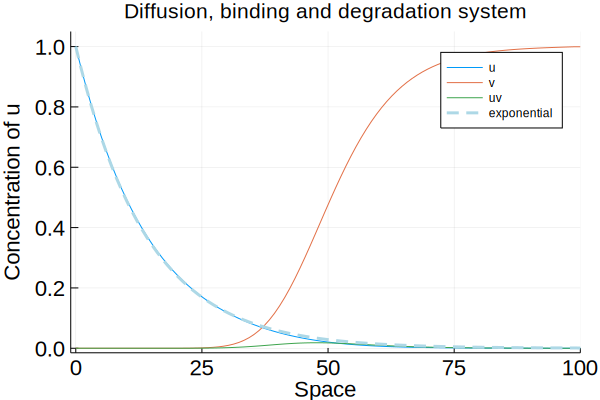

1-element Array{Float64,1}:
 0.0001733482154468297

In [20]:
#display(P1)
P1=plot(x,[u,v,uv],label=["u","v","uv"])

model2(t, p) = 1 * exp.(-p[1] * t)
p0 = [0.5]
fit = curve_fit(model2, x, u[:,1], p0)
param = fit.param
model2(x,param);
#P1=plot(x,u,xlims = (0,100),line=(3, :solid, :blue),label="u")
P1=plot!(x,model2(x,param),xlims = (0,100),line=(3, :dash, :lightblue),label="exponential", 
    xaxis = ("Space", (-1,100), 0:25:100,  font(15, "Futura")),
    yaxis = ("Concentration of u", (-0.015,1.05), 0:0.2:1,  font(15, "Futura")))
title!("Diffusion, binding and degradation system")
# display the plot (not done automatically!)
display(P1)
# save the current figure
savefig("Simulations_diff_bind_deg_consumption.pdf")
se = standard_error(fit)

Lets try now to fit it with an two parameter exponential

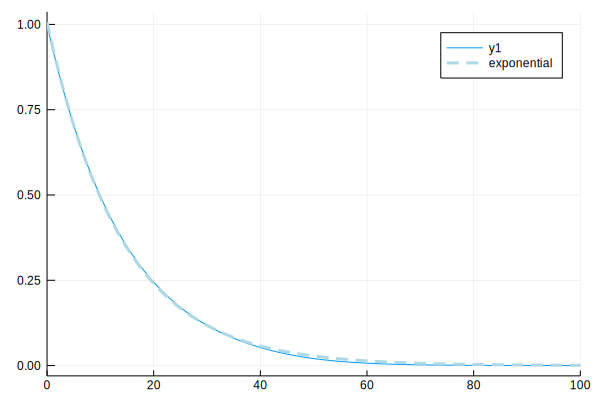

2-element Array{Float64,1}:
 0.0021878613468650165
 0.0002277691440097595

In [21]:
model(t, p) = p[1] * exp.(-p[2] * t)
p0 = [0.5, 0.5]
fit = curve_fit(model, x, u[:,1], p0)
param = fit.param
model(x,param);
P1=plot(x,u)
P1=plot!(x,model(x,param),xlims = (0,100),line=(3, :dash, :lightblue),label="exponential")
display(P1)
se = standard_error(fit)

Although, the characteristic length of the profile is larger than expected. It is still quite close to an exponential profile. 

# Receptor recycling

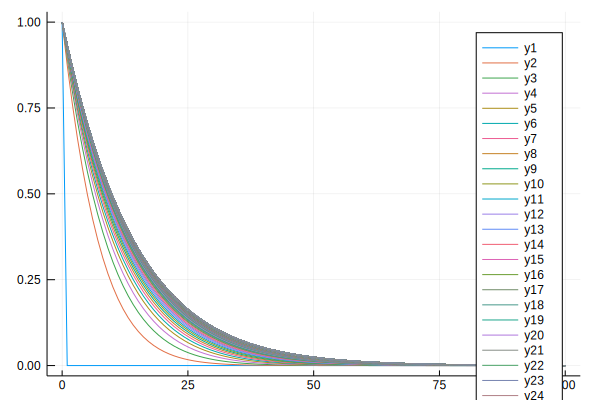

In [22]:
## spatial scaling
number_of_steps=100;
size_of_system=100;
space_step=size_of_system/number_of_steps;
x = LinRange(0,size_of_system,number_of_steps)

## temporal scaling
number_of_iterations=8000;
total_time=600;
time_step=total_time/number_of_iterations;

## initialize vectors
u=zeros(number_of_steps,1)
v₀=1
v=ones(number_of_steps,1)*v₀
uv=zeros(number_of_steps,1)

## Parameters and initial conditions
D=10; # ?m^2/min 

k_u=0.01
k_uv=0.1
u₀=1
k_on=0.1
k_off=0.1 #new

u[1]=u₀;
u_=u; 
uv_=uv; 
v_=v; 

P1=plot(x,u)
for ii=1:number_of_iterations
    for i=2:number_of_steps-1
       u[i]= u_[i] + time_step *(- k_on * u_[i] * v_[i] + k_off * uv_[i] - k_u * u_[i] + D * (u_[i-1] - 2 *u_[i]+u_[i+1])/(space_step*space_step));
       uv[i]= uv_[i] + time_step *(k_on * u_[i] * v_[i] - k_off * uv_[i] - k_uv * uv_[i]);
       v[i]= v_[i] + time_step *(- k_on * u_[i] * v_[i] + k_off * uv_[i] + k_uv * uv_[i]);  
    end
    
    u[1]=1;# fixed boundary conditions
    u[number_of_steps]=0; # fixed boundary conditions
    
    v[1]=v[2]; # zero flux boundary conditions
    uv[1]=uv[2]; # zero flux boundary conditions
    v[number_of_steps]=v[number_of_steps-1]; # zero flux boundary conditions
    uv[number_of_steps]=uv[number_of_steps-1]; # zero flux boundary conditions
    
    #u[1]=u[number_of_steps]; # periodic boundary conditions
    
    u_=u;v_=v;uv_=uv;
    if   ii% 10 == 0
        P1=plot!(x,u)
        #P2=plot!(x,v)
    end
end
display(P1)
#P1=plot!(x,u)
#P2=plot(x,v)
#plot(P1,P2,layout=(1,2))

Receptor reyclcing also fails

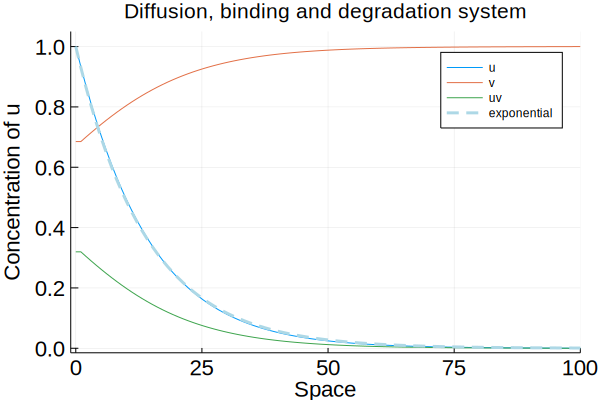

1-element Array{Float64,1}:
 0.00012642375698473723

In [23]:
#display(P1)
P1=plot(x,[u,v,uv],label=["u","v","uv"])

model2(t, p) = 1 * exp.(-p[1] * t)
p0 = [0.5]
fit = curve_fit(model2, x, u[:,1], p0)
param = fit.param
model2(x,param);
#P1=plot(x,u,xlims = (0,100),line=(3, :solid, :blue),label="u")
P1=plot!(x,model2(x,param),xlims = (0,100),line=(3, :dash, :lightblue),label="exponential", 
    xaxis = ("Space", (-1,100), 0:25:100,  font(15, "Futura")),
    yaxis = ("Concentration of u", (-0.015,1.05), 0:0.2:1,  font(15, "Futura")))
title!("Diffusion, binding and degradation system")
# display the plot (not done automatically!)
display(P1)
# save the current figure
savefig("Simulations_diff_bind_deg_consumption.pdf")
se = standard_error(fit)

lets plot the prediction alongside with the simulation

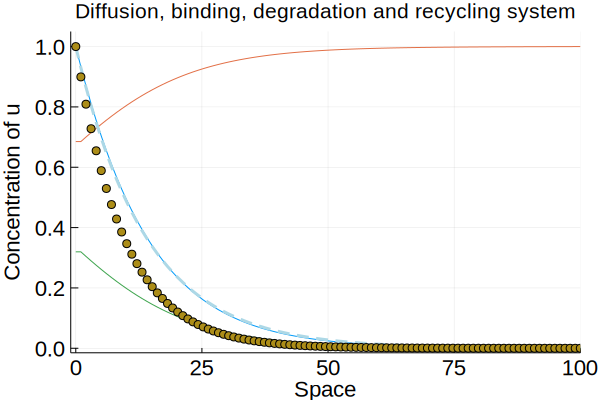

In [24]:
k_d=k_off/k_on
D_eff=D * k_d /(k_d+v₀)
k_eff=(k_u+(k_uv*v₀/k_d))* k_d/ (k_d+v₀)
plot!(x,x->u₀*exp(-x*sqrt(k_eff/D_eff)),legend=false,label="theory",seriestype=:scatter,
    xaxis = ("Space", (-1,100), 0:25:100,  font(15, "Futura")),
    yaxis = ("Concentration of u", (-0.015,1.05), 0:0.2:1,  font(15, "Futura")))
title!("Diffusion, binding, degradation and recycling system")
# display the plot (not done automatically!)
display(P1)
# save the current figure
savefig("Simulations_diff_bind_deg_consumption_recycling.pdf")

it still fails

# Scaling of morphonen gradients

Another mechanism for adjunsting morphogen profiles is via scaling. A well estrablished mechanims of interaction that resulst in scaling uses an additional diffusiing molecule that is activated downstream of teh receptor and regulates the degradation of the diffusion of the morphogen. this feedback loop between morhoghen and expander provides a mechanims thta makes teh value of k or D dependent of the size of the system.

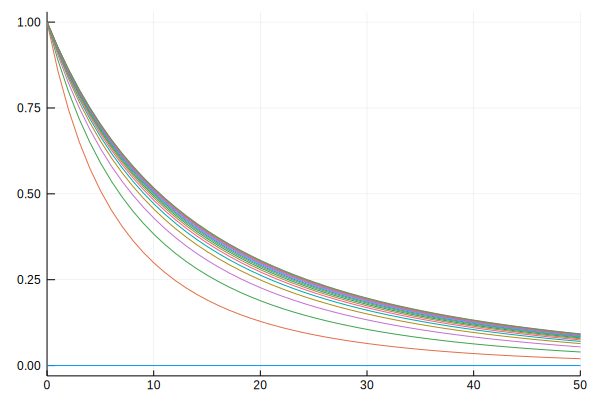

1-element Array{Float64,1}:
 0.00012642375698473723

In [25]:
## spatial scaling
number_of_steps=200;
size_of_system=200;
space_step=size_of_system/number_of_steps;
x = LinRange(0,size_of_system,number_of_steps)

## temporal scaling
number_of_iterations=8000*10;
total_time=400*10;
time_step=total_time/number_of_iterations;

## initialize vectors
u=zeros(number_of_steps,1)
v₀=0
v=ones(number_of_steps,1)*v₀
uv=zeros(number_of_steps,1)

## Parameters and initial conditions
D_u=15; # ?m^2/min
D_v=10; # ?m^2/min 

k_u1=0.1
k_u2=1
#k_on=0.1
#k_off=0.1 #new
k_v=0.00001
u₀=0
k_feedback=0.01
Hill=0.001

u[1]=u₀;
u_=u; 
uv_=uv; 
v_=v; 

P1=plot(x,u)
for ii=1:number_of_iterations
    for i=2:number_of_steps-1
       u[i]= u_[i] + time_step *(- k_u1 * u_[i] /(1+v_[i]) - k_u2 * u_[i]^2 / (1+v_[i]) + D_u * (u_[i-1] - 2 *u_[i]+u_[i+1])/(space_step*space_step));
       v[i]= v_[i] + time_step *(- k_v * v_[i] + k_feedback * (Hill^2/(Hill^2+u_[i]^2))+ D_v * (v_[i-1] - 2 *v_[i]+v_[i+1])/(space_step*space_step));
    end
    
    u[1]=1;# fixed boundary conditions
    u[number_of_steps]=u[number_of_steps-1]; # zero flux boundary conditions
    
    v[1]=v[2]; # zero flux boundary conditions
    uv[1]=uv[2]; # zero flux boundary conditions
    v[number_of_steps]=v[number_of_steps-1]; # zero flux boundary conditions
    uv[number_of_steps]=uv[number_of_steps-1]; # zero flux boundary conditions
    
    #u[1]=u[number_of_steps]; # periodic boundary conditions
    
    u_=u;v_=v;uv_=uv;
    if   ii% 5000 == 0
        P1=plot!(x,u,legend=false,xlims = (0,size_of_system/4))
        #P2=plot!(x,v)
    end
end
display(P1)
savefig("Scaling_sim_200.pdf")
se = standard_error(fit)
#P1=plot!(x,u)
#P2=plot(x,v)
#plot(P1,P2,layout=(1,2))

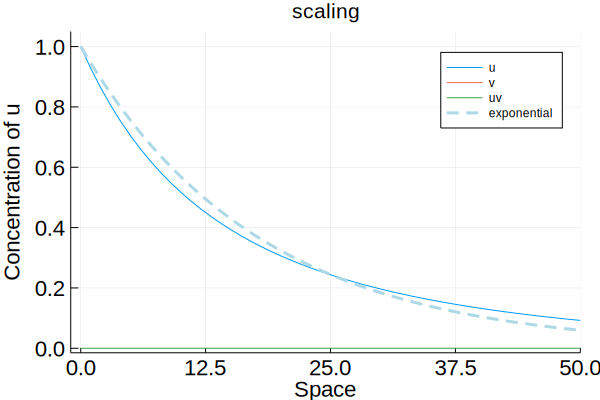

1-element Array{Float64,1}:
 11.274736506949983

In [26]:
#display(P1)
P1=plot(x,[u,v,uv],label=["u","v","uv"])

model2(t, p) = 1 * exp.(-p[1] * t)
p0 = [0.5]
fit = curve_fit(model2, x, u[:,1], p0)
param = fit.param
model2(x,param);
#P1=plot(x,u,xlims = (0,100),line=(3, :solid, :blue),label="u")
P1=plot!(x,model2(x,param),xlims = (0,size_of_system/2),line=(3, :dash, :lightblue),label="exponential", 
    xaxis = ("Space", (-1,size_of_system/4), 0:size_of_system/16:size_of_system/4,  font(15, "Futura")),
    yaxis = ("Concentration of u", (-0.015,1.05), 0:0.2:1,  font(15, "Futura")))
title!("scaling")
# display the plot (not done automatically!)
display(P1)
# save the current figure
savefig("Scaling_fit_200.pdf")
param*size_of_system

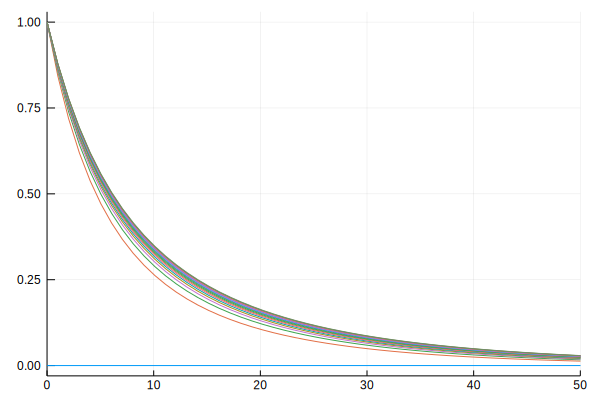

1-element Array{Float64,1}:
 0.0005672227308754427

In [27]:
## spatial scaling
number_of_steps=100;
size_of_system=100;
space_step=size_of_system/number_of_steps;
x = LinRange(0,size_of_system,number_of_steps)

## temporal scaling
number_of_iterations=8000*10;
total_time=400*10;
time_step=total_time/number_of_iterations;

## initialize vectors
u=zeros(number_of_steps,1)
v₀=0
v=ones(number_of_steps,1)*v₀
uv=zeros(number_of_steps,1)

## Parameters and initial conditions
D_u=15; # ?m^2/min
D_v=10; # ?m^2/min 

k_u1=0.1
k_u2=1
#k_on=0.1
#k_off=0.1 #new
k_v=0.00001
u₀=0
k_feedback=0.01
Hill=0.001

u[1]=u₀;
u_=u; 
uv_=uv; 
v_=v; 

P1=plot(x,u)
for ii=1:number_of_iterations
    for i=2:number_of_steps-1
       u[i]= u_[i] + time_step *(- k_u1 * u_[i] /(1+v_[i]) - k_u2 * u_[i]^2 / (1+v_[i]) + D_u * (u_[i-1] - 2 *u_[i]+u_[i+1])/(space_step*space_step));
       v[i]= v_[i] + time_step *(- k_v * v_[i] + k_feedback * (Hill^2/(Hill^2+u_[i]^2))+ D_v * (v_[i-1] - 2 *v_[i]+v_[i+1])/(space_step*space_step));
    end
    
    u[1]=1;# fixed boundary conditions
    u[number_of_steps]=u[number_of_steps-1]; # zero flux boundary conditions
    
    v[1]=v[2]; # zero flux boundary conditions
    uv[1]=uv[2]; # zero flux boundary conditions
    v[number_of_steps]=v[number_of_steps-1]; # zero flux boundary conditions
    uv[number_of_steps]=uv[number_of_steps-1]; # zero flux boundary conditions
    
    #u[1]=u[number_of_steps]; # periodic boundary conditions
    
    u_=u;v_=v;uv_=uv;
    if   ii% 5000 == 0
        P1=plot!(x,u,legend=false,xlims = (0,size_of_system/2))
        #P2=plot!(x,v)
    end
end
display(P1)
savefig("Scaling_sim_100.pdf")
se = standard_error(fit)
#P1=plot!(x,u)
#P2=plot(x,v)
#plot(P1,P2,layout=(1,2))

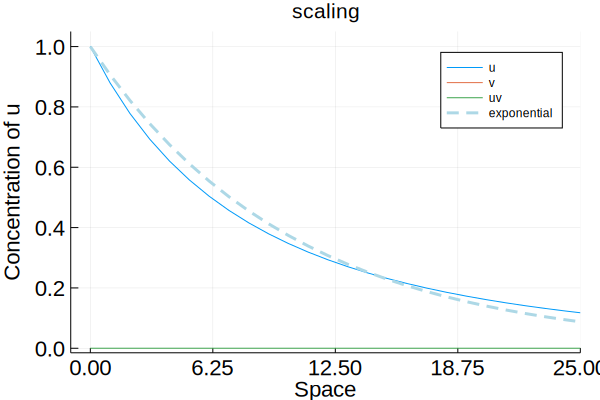

1-element Array{Float64,1}:
 9.735984302354495

In [28]:
#display(P1)
P1=plot(x,[u,v,uv],label=["u","v","uv"])

model2(t, p) = 1 * exp.(-p[1] * t)
p0 = [0.5]
fit = curve_fit(model2, x, u[:,1], p0)
param = fit.param
model2(x,param);
#P1=plot(x,u,xlims = (0,100),line=(3, :solid, :blue),label="u")
P1=plot!(x,model2(x,param),xlims = (0,size_of_system/4),line=(3, :dash, :lightblue),label="exponential", 
    xaxis = ("Space", (-1,size_of_system/4), 0:size_of_system/16:size_of_system/4,  font(15, "Futura")),
    yaxis = ("Concentration of u", (-0.015,1.05), 0:0.2:1,  font(15, "Futura")))
title!("scaling")
# display the plot (not done automatically!)
display(P1)
# save the current figure
savefig("Scaling_fit_100.pdf")
param*size_of_system

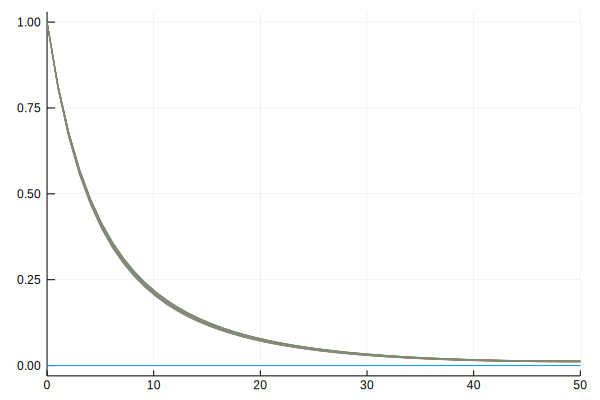

1-element Array{Float64,1}:
 0.00138771802094526

In [29]:
## spatial scaling
number_of_steps=50;
size_of_system=50;
space_step=size_of_system/number_of_steps;
x = LinRange(0,size_of_system,number_of_steps)

## temporal scaling
number_of_iterations=8000*10;
total_time=400*10;
time_step=total_time/number_of_iterations;

## initialize vectors
u=zeros(number_of_steps,1)
v₀=0
v=ones(number_of_steps,1)*v₀
uv=zeros(number_of_steps,1)

## Parameters and initial conditions
D_u=15; # ?m^2/min
D_v=10; # ?m^2/min 

k_u1=0.1
k_u2=1
#k_on=0.1
#k_off=0.1 #new
k_v=0.00001
u₀=0
k_feedback=0.01
Hill=0.001

u[1]=u₀;
u_=u; 
uv_=uv; 
v_=v; 

P1=plot(x,u)
for ii=1:number_of_iterations
    for i=2:number_of_steps-1
       u[i]= u_[i] + time_step *(- k_u1 * u_[i] /(1+v_[i]) - k_u2 * u_[i]^2 / (1+v_[i]) + D_u * (u_[i-1] - 2 *u_[i]+u_[i+1])/(space_step*space_step));
       v[i]= v_[i] + time_step *(- k_v * v_[i] + k_feedback * (Hill^2/(Hill^2+u_[i]^2))+ D_v * (v_[i-1] - 2 *v_[i]+v_[i+1])/(space_step*space_step));
    end
    
    u[1]=1;# fixed boundary conditions
    u[number_of_steps]=u[number_of_steps-1]; # zero flux boundary conditions
    
    v[1]=v[2]; # zero flux boundary conditions
    uv[1]=uv[2]; # zero flux boundary conditions
    v[number_of_steps]=v[number_of_steps-1]; # zero flux boundary conditions
    uv[number_of_steps]=uv[number_of_steps-1]; # zero flux boundary conditions
    
    #u[1]=u[number_of_steps]; # periodic boundary conditions
    
    u_=u;v_=v;uv_=uv;
    if   ii% 5000 == 0
        P1=plot!(x,u,legend=false,xlims = (0,size_of_system))
        #P2=plot!(x,v)
    end
end
display(P1)
savefig("Scaling_sim_50.pdf")
se = standard_error(fit)
#P1=plot!(x,u)
#P2=plot(x,v)
#plot(P1,P2,layout=(1,2))

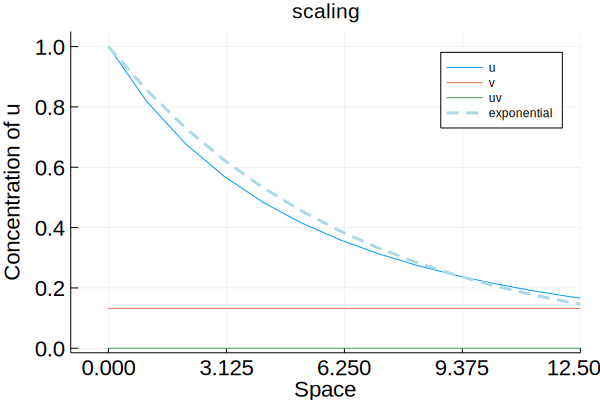

1-element Array{Float64,1}:
 7.702112734042589

In [30]:
#display(P1)
P1=plot(x,[u,v,uv],label=["u","v","uv"])

model2(t, p) = 1 * exp.(-p[1] * t)
p0 = [0.5]
fit = curve_fit(model2, x, u[:,1], p0)
param = fit.param
model2(x,param);
#P1=plot(x,u,xlims = (0,100),line=(3, :solid, :blue),label="u")
P1=plot!(x,model2(x,param),xlims = (0,size_of_system/4),line=(3, :dash, :lightblue),label="exponential", 
    xaxis = ("Space", (-1,size_of_system/4), 0:size_of_system/16:size_of_system/4,  font(15, "Futura")),
    yaxis = ("Concentration of u", (-0.015,1.05), 0:0.2:1,  font(15, "Futura")))
title!("scaling")
# display the plot (not done automatically!)
display(P1)
# save the current figure
savefig("Scaling_fit_50.pdf")
param*size_of_system

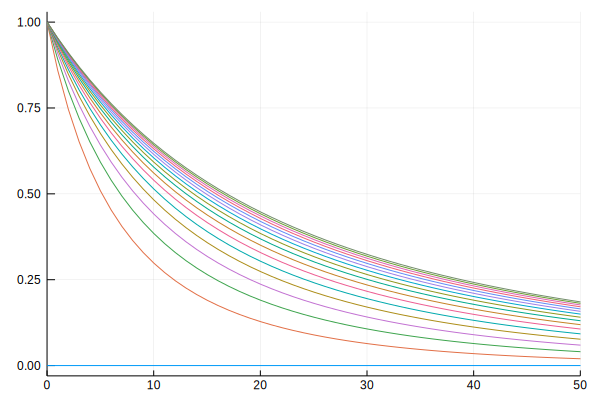

1-element Array{Float64,1}:
 0.0031706722149880216

In [31]:
## spatial scaling
number_of_steps=400;
size_of_system=400;
space_step=size_of_system/number_of_steps;
x = LinRange(0,size_of_system,number_of_steps)

## temporal scaling
number_of_iterations=8000*10;
total_time=400*10;
time_step=total_time/number_of_iterations;

## initialize vectors
u=zeros(number_of_steps,1)
v₀=0
v=ones(number_of_steps,1)*v₀
uv=zeros(number_of_steps,1)

## Parameters and initial conditions
D_u=15; # ?m^2/min
D_v=10; # ?m^2/min 

k_u1=0.1
k_u2=1
#k_on=0.1
#k_off=0.1 #new
k_v=0.00001
u₀=0
k_feedback=0.01
Hill=0.001

u[1]=u₀;
u_=u; 
uv_=uv; 
v_=v; 

P1=plot(x,u)
for ii=1:number_of_iterations
    for i=2:number_of_steps-1
       u[i]= u_[i] + time_step *(- k_u1 * u_[i] /(1+v_[i]) - k_u2 * u_[i]^2 / (1+v_[i]) + D_u * (u_[i-1] - 2 *u_[i]+u_[i+1])/(space_step*space_step));
       v[i]= v_[i] + time_step *(- k_v * v_[i] + k_feedback * (Hill^2/(Hill^2+u_[i]^2))+ D_v * (v_[i-1] - 2 *v_[i]+v_[i+1])/(space_step*space_step));
    end
    
    u[1]=1;# fixed boundary conditions
    u[number_of_steps]=u[number_of_steps-1]; # zero flux boundary conditions
    
    v[1]=v[2]; # zero flux boundary conditions
    uv[1]=uv[2]; # zero flux boundary conditions
    v[number_of_steps]=v[number_of_steps-1]; # zero flux boundary conditions
    uv[number_of_steps]=uv[number_of_steps-1]; # zero flux boundary conditions
    
    #u[1]=u[number_of_steps]; # periodic boundary conditions
    
    u_=u;v_=v;uv_=uv;
    if   ii% 5000 == 0
        P1=plot!(x,u,legend=false,xlims = (0,size_of_system/8))
        #P2=plot!(x,v)
    end
end
display(P1)
savefig("Scaling_sim_400.pdf")
se = standard_error(fit)
#P1=plot!(x,u)
#P2=plot(x,v)
#plot(P1,P2,layout=(1,2))

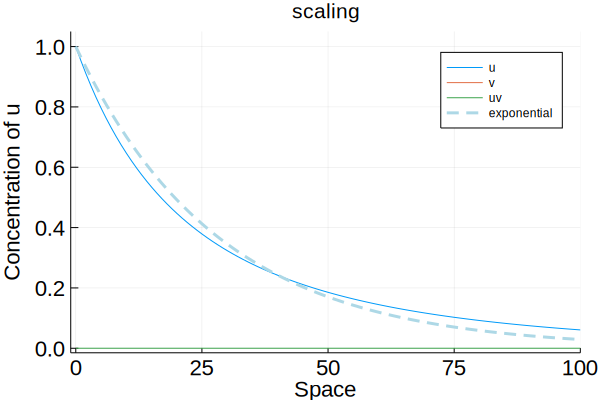

1-element Array{Float64,1}:
 14.162061527697785

In [32]:
#display(P1)
P1=plot(x,[u,v,uv],label=["u","v","uv"])

model2(t, p) = 1 * exp.(-p[1] * t)
p0 = [0.5]
fit = curve_fit(model2, x, u[:,1], p0)
param = fit.param
model2(x,param);
#P1=plot(x,u,xlims = (0,100),line=(3, :solid, :blue),label="u")
P1=plot!(x,model2(x,param),xlims = (0,size_of_system/4),line=(3, :dash, :lightblue),label="exponential", 
    xaxis = ("Space", (-1,size_of_system/4), 0:size_of_system/16:size_of_system/4,  font(15, "Futura")),
    yaxis = ("Concentration of u", (-0.015,1.05), 0:0.2:1,  font(15, "Futura")))
title!("scaling")
# display the plot (not done automatically!)
display(P1)
# save the current figure
savefig("Scaling_fit_400.pdf")
param*size_of_system

Scaling works under this conditions. we will play with that model.

# Negative feedback loop

Lets try now repression of the expression of receptors by the active complex `uv`. Thsi is a commno desesnitization mechanimsn built in in many signaling pathways. 


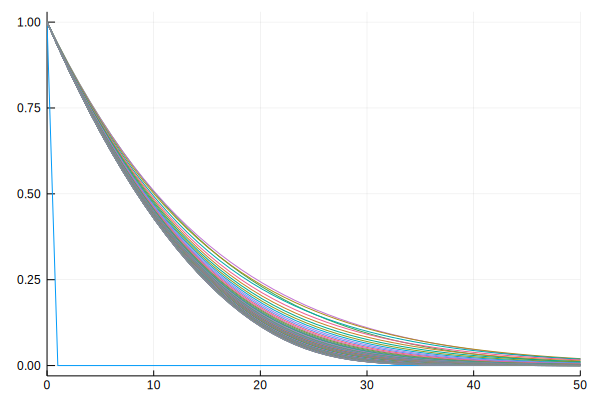

1-element Array{Float64,1}:
 0.00025672151683029813

In [33]:
## spatial scaling
number_of_steps=100;
size_of_system=100;
space_step=size_of_system/number_of_steps;
x = LinRange(0,size_of_system,number_of_steps)

## temporal scaling
number_of_iterations=8000;
total_time=400;
time_step=total_time/number_of_iterations;

## initialize vectors
u=zeros(number_of_steps,1)
v₀=0
v=ones(number_of_steps,1)*v₀
uv=zeros(number_of_steps,1)

## Parameters and initial conditions
D=10; # ?m^2/min 

k_u=0.01
k_on=0.1
k_off=0.1 #new
k_uv=0.1
u₀=1
k_feedback=0.05

u[1]=u₀;
u_=u; 
uv_=uv; 
v_=v; 

P1=plot(x,u)
for ii=1:number_of_iterations
    for i=2:number_of_steps-1
       u[i]= u_[i] + time_step *(- k_on * u_[i] * v_[i] + k_off * uv_[i] - k_u * u_[i] + D * (u_[i-1] - 2 *u_[i]+u_[i+1])/(space_step*space_step));
       uv[i]= uv_[i] + time_step *(k_on * u_[i] * v_[i] - k_off * uv_[i]- k_uv * uv_[i]);
       v[i]= v_[i] + time_step *(- k_on * u_[i] * v_[i] + k_off * uv_[i] + k_feedback * 0.2^3/(0.2^3+uv_[i]^3));  
    end
    
    u[1]=1;# fixed boundary conditions
    u[number_of_steps]=0; # fixed boundary conditions
    
    v[1]=v[2]; # zero flux boundary conditions
    uv[1]=uv[2]; # zero flux boundary conditions
    v[number_of_steps]=v[number_of_steps-1]; # zero flux boundary conditions
    uv[number_of_steps]=uv[number_of_steps-1]; # zero flux boundary conditions
    
    #u[1]=u[number_of_steps]; # periodic boundary conditions
    
    u_=u;v_=v;uv_=uv;
    if   ii% 100 == 0
        P1=plot!(x,u,legend=false,xlims = (0,50))
        #P2=plot!(x,v)
    end
end
display(P1)
savefig("Negative_feedback_loop_simulations.pdf")
se = standard_error(fit)
#P1=plot!(x,u)
#P2=plot(x,v)
#plot(P1,P2,layout=(1,2))

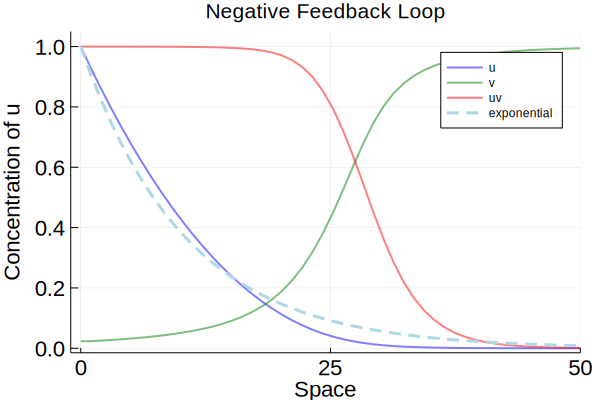

1-element Array{Float64,1}:
 0.001527492063666537

In [34]:
#display(P1)
P1=plot(x,[u,v/maximum(v),uv/maximum(uv)],label=["u","v","uv"],line=(2, 0.5, [:blue :green :red]))

model2(t, p) = 1 * exp.(-p[1] * t)
p0 = [0.5]
fit = curve_fit(model2, x, u[:,1], p0)
param = fit.param
model2(x,param);
P1=plot!(x,model2(x,param),xlims = (0,50),line=(3, :dash, :lightblue),label="exponential",
    xaxis = ("Space", (-1,50), 0:25:100,  font(15, "Futura")),
    yaxis = ("Concentration of u", (-0.015,1.05), 0:0.2:1,  font(15, "Futura")))
title!("Negative Feedback Loop")
# display the plot (not done automatically!)
display(P1)
# save the current figure
savefig("Negative_feedback_loop.pdf")
se = standard_error(fit)

Lets try now to fit it with an two parameter exponential

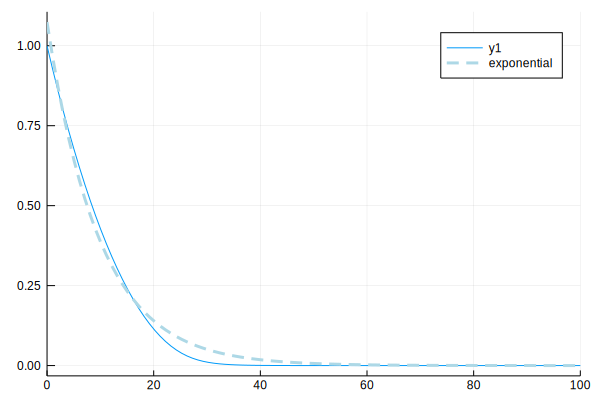

2-element Array{Float64,1}:
 0.012829918441319896 
 0.0018104993677953497

In [35]:
model(t, p) = p[1] * exp.(-p[2] * t)
p0 = [0.5, 0.5]

fit = curve_fit(model, x, u[:,1], p0)
param = fit.param
model(x,param);
P1=plot(x,u)
P1=plot!(x,model(x,param),xlims = (0,100),line=(3, :dash, :lightblue),label="exponential")
display(P1)
se = standard_error(fit)

it produces a more linear, and the gradient moves backward

# Positive feedback Loop
The next example is a morphogen `u` that activates the expression of a nondiffusive receptor `v` that consumes the morphogen, but using a more typical Hill function for activation with some cooperativity

$$   
f(u) \overset{k_1}{\longrightarrow}  v \tag{6}\\
v + u \overset{k_2}{\longrightarrow} 0
$$ 



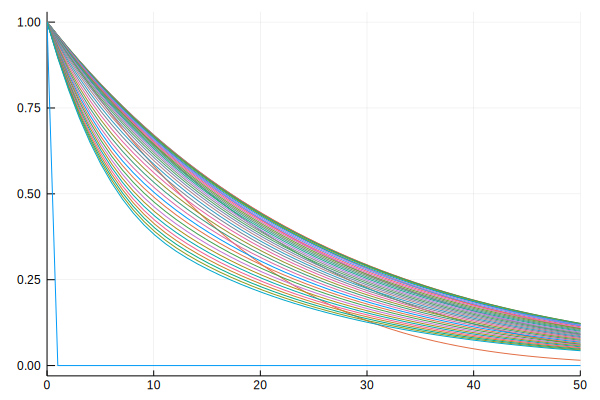

2-element Array{Float64,1}:
 0.012829918441319896 
 0.0018104993677953497

In [36]:
## spatial scaling
number_of_steps=100;
size_of_system=100;
space_step=size_of_system/number_of_steps;
x = LinRange(0,size_of_system,number_of_steps)

## temporal scaling
number_of_iterations=20000;
total_time=600;
time_step=total_time/number_of_iterations;

## initialize vectors
u=zeros(number_of_steps,1)
v₀=0
v=ones(number_of_steps,1)*v₀
uv=zeros(number_of_steps,1)

## Parameters and initial conditions
D=10; # ?m^2/min 

k_u=0.01
k_on=0.05
k_off=0.1 #new
k_uv=0.01
u₀=1
k_feedback=0.15
k_basal=0.01

u[1]=u₀;
u_=u; 
uv_=uv; 
v_=v; 

P1=plot(x,u)
for ii=1:number_of_iterations
    for i=2:number_of_steps-1
       u[i]= u_[i] + time_step *(- k_on * u_[i] * v_[i] + k_off * uv_[i] - k_u * u_[i] + D * (u_[i-1] - 2 *u_[i]+u_[i+1])/(space_step*space_step));
       uv[i]= uv_[i] + time_step *(k_on * u_[i] * v_[i] - k_off * uv_[i]- k_uv * uv_[i]);
       v[i]= v_[i] + time_step *(- k_on * u_[i] * v_[i] + k_off * uv_[i] + k_basal +k_feedback * uv_[i]^3/(1.5^3+uv_[i]^3));  
    end
    
    u[1]=1;# fixed boundary conditions
    u[number_of_steps]=0; # fixed boundary conditions
    
    v[1]=v[2]; # zero flux boundary conditions
    uv[1]=uv[2]; # zero flux boundary conditions
    v[number_of_steps]=v[number_of_steps-1]; # zero flux boundary conditions
    uv[number_of_steps]=uv[number_of_steps-1]; # zero flux boundary conditions
    
    #u[1]=u[number_of_steps]; # periodic boundary conditions
    
    u_=u;v_=v;uv_=uv;
    if   ii% 500 == 0
        P1=plot!(x,u,legend=false,xlims = (0,50))
        #P2=plot!(x,v)
    end
end
display(P1)
savefig("Positive_feedback_loop_simulations.pdf")
se = standard_error(fit)
#P1=plot!(x,u)
#P2=plot(x,v)
#plot(P1,P2,layout=(1,2))

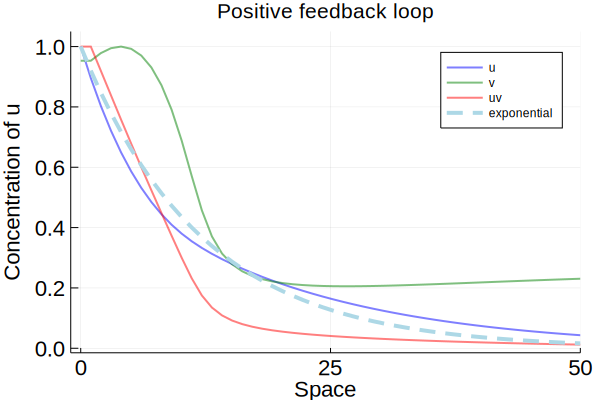

1-element Array{Float64,1}:
 0.0014421244279122088

In [37]:
#display(P1)
P1=plot(x,[u,v/maximum(v),uv/maximum(uv)],label=["u","v","uv"],line=(2, 0.5, [:blue :green :red]))
#P1=plot(x,[u,v,uv],label=["u","v","uv"])

model2(t, p) = 1 * exp.(-p[1] * t)

p0 = [0.5]
fit = curve_fit(model2, x, u[:,1], p0)
param = fit.param
model2(x,param);
P1=plot!(x,model2(x,param),xlims = (0,50),line=(4, :dash, :lightblue),label="exponential", 
    xaxis = ("Space", (-1,50), 0:25:100,  font(15, "Futura")),
    yaxis = ("Concentration of u", (-0.015,1.05), 0:0.2:1,  font(15, "Futura")))
title!("Positive feedback loop ")
# display the plot (not done automatically!)
display(P1)
# save the current figure
savefig("Positive_feedback_loop.pdf")
se = standard_error(fit)

Lets try now to fit it with an two parameter exponential

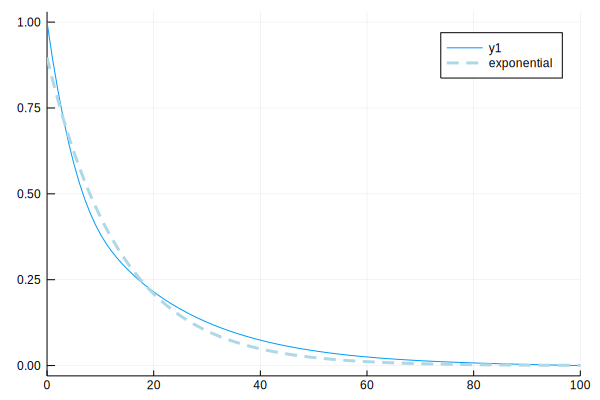

2-element Array{Float64,1}:
 0.012014336800084022 
 0.0014310761863402105

In [38]:
model(t, p) = p[1] * exp.(-p[2] * t)
p0 = [0.5, 0.5]
fit = curve_fit(model, x, u[:,1], p0)
param = fit.param
model(x,param);
P1=plot(x,u)
P1=plot!(x,model(x,param),xlims = (0,100),line=(3, :dash, :lightblue),label="exponential")
display(P1)
se = standard_error(fit)

## Learning the nonlinear fitting tool in Julia

In [39]:
tdata = LinRange(0,10,20)
ydata = model(tdata, [1.0 2.0]) + 0.01*randn(length(tdata))
u[:,1]

100-element Array{Float64,1}:
 1.0                  
 0.8955150757661975   
 0.8027729799472523   
 0.7209000463227524   
 0.6490167089370993   
 0.5862495641193257   
 0.5317414988298145   
 0.48465845327304247  
 0.44419120465991185  
 0.4095499424483145   
 0.37994806002622944  
 0.3545717698173895   
 0.33255348170119575  
 ⋮                    
 0.0037653275777200295
 0.0033888507548005603
 0.003022280259785635 
 0.0026645487680642035
 0.0023146150884605795
 0.0019714609801020308
 0.001634088029391141 
 0.0013015145774098401
 0.0009727726880775112
 0.0006469051473529738
 0.000322962483707381 
 0.0                  

In [40]:
param = fit.param

2-element Array{Float64,1}:
 0.8973281844808917 
 0.07287830303130943

In [41]:
cov = estimate_covar(fit)

2×2 Array{Float64,2}:
 0.000144344  1.17026e-5
 1.17026e-5   2.04798e-6

In [42]:
se = standard_error(fit)

2-element Array{Float64,1}:
 0.012014336800084022 
 0.0014310761863402105

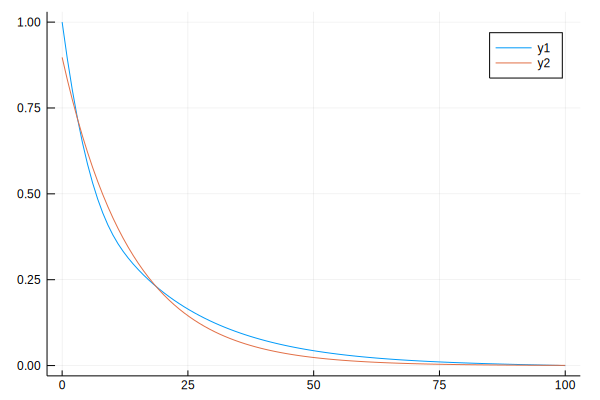

In [43]:
model(x,param);
plot(x,u)
plot!(x,model(x,param))